In [1]:
import scraper
import numpy as np
import config
import tarfile
import matplotlib.pyplot as plt

In [2]:
userHome = config.userHome()
outdir = userHome + "projects/nepc/data/formatted/n/zatsarinny/"
tmpdir = userHome + "projects/nepc/tmp/"

In [3]:
scraper.rmdir(outdir)
scraper.mkdir(outdir)
scraper.rmdir(tmpdir)
scraper.mkdir(tmpdir)

In [4]:
# specifying the tar file name 
bsr_tarfile = userHome + "projects/nepc/data/raw/bsr/N_2014_archive.tar.gz"
  
# check that it's a valid tar file
for file_name in [ bsr_tarfile ]:
    try:
        print(file_name, tarfile.is_tarfile(file_name))
    except (IOError, err):
        print(file_name, err)

/Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz True


In [5]:
t = tarfile.open(bsr_tarfile, 'r')

# peek inside
print("First 10 files in " + bsr_tarfile + ": ")
print(t.getnames()[:10])

First 10 files in /Users/adamson/projects/nepc/data/raw/bsr/N_2014_archive.tar.gz: 
['N_2014_archive', 'N_2014_archive/2014_N.pdf', 'N_2014_archive/ion_001', 'N_2014_archive/ion_002', 'N_2014_archive/ion_003', 'N_2014_archive/mt_001', 'N_2014_archive/mt_002', 'N_2014_archive/mt_003', 'N_2014_archive/read_me', 'N_2014_archive/tr_001_001']


In [6]:
t.extractall(path=tmpdir)

Put all of the electronic states into a list. `n_states_list[0]` is a placeholder, so the indices correspond to the numbering of the states in wang2014. (The (2s$^2$2p$^3$) ${}^4S^o$ ground state is item 1 in the list.)

In [7]:
with open(userHome + "projects/nepc/src/mysql/n_states.tsv") as f:
    n_states_lines = f.readlines()[1:]

n_states_list = []
for line in n_states_lines:
    n_states_list.append(line.split('\t'))

In [8]:
with open(userHome + "projects/nepc/src/mysql/n+_states.tsv") as f:
    np_states_lines = f.readlines()[1:]

np_states_list = []
for line in np_states_lines:
    np_states_list.append(line.split('\t'))

In [9]:
n_states=[n_states_list[i][9] for i in range(1,len(n_states_list))]
np_states=[np_states_list[i][9] for i in range(1,len(np_states_list))]

Electron-impact ionization
-------------------------------

Cross sections for electron-impact ionization of atomic nitrogen from the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state.

In [10]:
#FIXME: need the Term Symbols for all of the N+ states

In [11]:
np_states

['N+(2s22p2_3P0)', 'N+(2s12p3)', 'N+(2s12p3)']

In [12]:
for i in range(3):
    data = np.loadtxt(tmpdir + "/N_2014_archive/ion_00" + str(i+1), skiprows=1, usecols=(0,1))
    filename = outdir+"ionization_" + n_states[i]
    scraper.writeDataToFile(data,filename + ".dat")
    scraper.writeMetaDataToFile(filename=filename + ".met",
                            specie="N",
                            process="total",
                            units_e=1.0,
                            units_sigma=1.0E-20,
                                lhsA=n_states[i],
                                rhsA=np_states[i],
                            ref="wang2014",
                            background='From BSR calculations. Raw data provided by Zatsarinny.  Used predominate electronic state for N+ on RHS.')

Momentum transfer
----------------------

In [13]:
#FIXME

Momentum transfer cross sections for electron impact with atomic nitrogen in the (2s$^2$2p$^3$) ${}^4S^o$ ground state, metastable (2s$^2$2p$^3$) ${}^2D^o$ state, and the metastable (2s$^2$2p$^3$) ${}^2P^o$ state.

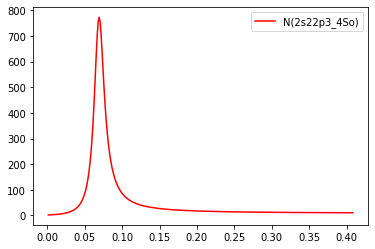

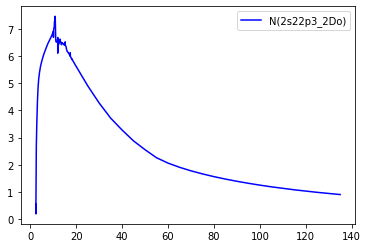

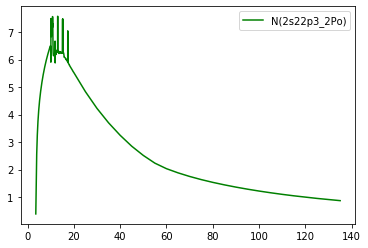

In [14]:
for i in range(3):
    data = np.loadtxt(tmpdir + "/N_2014_archive/mt_00" + str(i+1), skiprows=1, usecols=(0,1))
    filename = outdir+"momentum_transfer_" + n_states[i]
    scraper.writeDataToFile(data,filename + ".dat")
    scraper.writeMetaDataToFile(filename=filename + ".met",
                            specie="N",
                            process="momentum",
                            units_e=1.0,
                            units_sigma=1.0E-20,
                                lhsA=n_states[i],
                            ref="wang2014",
                            background='From BSR calculations. Raw data provided by Zatsarinny.')
    x,y = data.T
    if i == 0:
        i_max = 120
        x = x[:i_max]
        y = y[:i_max]
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    plot_symbols = ["r-", "b-", "g-"]
    plt.plot(x, y, plot_symbols[i], label = n_states[i])
    plt.legend(loc='upper right');
    plt.show() 